# Figure 1 and Supplementary figure 2: BALTIC tree plotting

September 23, 2019 

This notebook contains code for producing Figure 1 and supplemental figure 2. This code will read in nextstrain jsons, plot full genome trees with baltic, and pull out subtrees containing my Cambodian samples described in the paper. The sizes of these trees is gigantic, because I did not implement geographic subsampling. For the analysis in Figure 6 in which we quantified mutations on branches leading to human infections, I did not want to subset the data at all to maximize the number of mutations we detected. Therefore, plotting these figures takes a very long time. If the jupyter notebook cell runs a long time, that is expected and normal. 

In [33]:
import sys, subprocess, glob, os, shutil, re, importlib
from subprocess import call
import imp

"""this should run with the most recently updated baltic. However, I have also 
included a functional version in this folder"""
bt = imp.load_source('baltic', '../baltic/baltic.py')

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties

import numpy as np
from scipy.special import binom

import datetime as dt

mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

## Read in tree jsons as baltic tree objects

In [34]:
PB2='../data/tree-jsons/flu_avian_h5n1_pb2_tree.json'
PB1='../data/tree-jsons/flu_avian_h5n1_pb1_tree.json'
PA='../data/tree-jsons/flu_avian_h5n1_pa_tree.json'
HA='../data/tree-jsons/flu_avian_h5n1_ha_tree.json'
NP='../data/tree-jsons/flu_avian_h5n1_np_tree.json'
NA='../data/tree-jsons/flu_avian_h5n1_na_tree.json'
MP='../data/tree-jsons/flu_avian_h5n1_mp_tree.json'
NS='../data/tree-jsons/flu_avian_h5n1_ns_tree.json'

json_translation={'absoluteTime':'num_date','height':'branch_length','name':'strain'} ## allows baltic to find correct attributes in JSON, height and name are required at a minimum
PB2_json_meta={'file':PB2.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
PB1_json_meta={'file':PB1.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
PA_json_meta={'file':PA.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
HA_json_meta={'file':HA.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
NP_json_meta={'file':NP.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
NA_json_meta={'file':NA.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
MP_json_meta={'file':MP.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
NS_json_meta={'file':NS.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org

PB2_tree=bt.loadJSON(PB2,json_translation) ## give loadJSON the name of the tree file, the translation dictionary and (optionally) the meta file
PB1_tree =bt.loadJSON(PB1,json_translation)
PA_tree =bt.loadJSON(PA,json_translation)
HA_tree =bt.loadJSON(HA,json_translation)
NP_tree =bt.loadJSON(NP,json_translation)
NA_tree =bt.loadJSON(NA,json_translation)
MP_tree =bt.loadJSON(MP,json_translation)
NS_tree =bt.loadJSON(NS,json_translation)


Tree height: 53.341950
Tree length: 3030.256033
annotations present

Numbers of objects in tree: 7254 (3191 nodes and 4063 leaves)


Tree height: 43.983810
Tree length: 3107.445536
annotations present

Numbers of objects in tree: 6944 (3077 nodes and 3867 leaves)


Tree height: 44.199351
Tree length: 3972.771077
annotations present

Numbers of objects in tree: 7361 (3279 nodes and 4082 leaves)


Tree height: 28.868050
Tree length: 3812.458188
annotations present

Numbers of objects in tree: 11418 (4987 nodes and 6431 leaves)


Tree height: 44.408307
Tree length: 2965.364199
annotations present

Numbers of objects in tree: 7115 (3045 nodes and 4070 leaves)


Tree height: 42.129869
Tree length: 3919.370920
annotations present

Numbers of objects in tree: 9355 (3998 nodes and 5357 leaves)


Tree height: 35.044643
Tree length: 3471.249953
annotations present

Numbers of objects in tree: 6832 (2892 nodes and 3940 leaves)


Tree height: 36.423330
Tree length: 2997.889752
annotations present

## Functions for returning subtrees

Given a full tree, parse through that tree to pull out the subtree or subtrees containing the Cambodian samples. This is a little hacky, and definitely specific to this dataset, but it does work. 

In [4]:
def return_subtree_HA_NA(tree):
    subtrees = []
    
    for k in tree.Objects: 
        if k.branchType == 'node':
            count = 0
            for m in my_list: 
                if m in k.leaves:
                    count += 1
            if count == 12:
                parent_node = k 
                subtree1 = tree.subtree(parent_node)
                
        if k.branchType == 'leaf' and k.name == 'A/duck/Cambodia/Y0224304/2014':
            parent_node = k.parent
            subtree2 = tree.subtree(parent_node)
        
    subtrees.append(subtree1)
    subtrees.append(subtree2)
                
    return(subtrees)

In [5]:
def return_subtree_PB2_PA_NP_MP(tree):
    subtrees = []
    
    for k in tree.Objects: 
        if k.branchType == 'node':
            
            # first, query clade 1
            count = 0
            for m in clade_1_list: 
                if m in k.leaves:
                    count += 1
            if count == 5:
                parent_node = k 
                subtree1 = tree.subtree(parent_node)
            
            # then, query clade 2
            count = 0
            for m in clade_re_list: 
                if m in k.leaves:
                    count += 1
            if count == 8:
                parent_node = k 
                subtree2 = tree.subtree(parent_node)
    
    subtrees.append(subtree1)
    subtrees.append(subtree2)
                                
    return(subtrees)

In [6]:
def return_subtree_PB1_NS(tree):
    subtrees = []
    
    for k in tree.Objects: 
        if k.branchType == 'node':
            
            count = 0
            for m in clade_1_list: 
                if m in k.leaves:
                    count += 1
            if count == 5:
                parent_node = k 
                subtree1 = tree.subtree(parent_node)
            
            count = 0
            for m in clade_re_list: 
                if m in k.leaves:
                    count += 1
            if count == 7:
                parent_node = k 
                subtree2 = tree.subtree(parent_node)
                
        if k.branchType == 'leaf' and k.name == 'A/duck/Cambodia/Y0224304/2014':
            parent_node = k.parent
            subtree3 = tree.subtree(parent_node)

    subtrees.append(subtree1)
    subtrees.append(subtree2)
    subtrees.append(subtree3)

    return(subtrees)

In [7]:
def find_max_and_min_y_values(subtrees):
    max_min_y_values = []
    
    for tree in subtrees:
        yvalues = []
        for k in tree.Objects:
            yvalues.append(k.y)
        maximum = max(yvalues)
        minimum = min(yvalues)
        max_min_y_values.append({"max":maximum,"min":minimum,"tree":tree})
    
    # this will sort the list by the max attribute, going from smallest to largest
    max_min_y_values = sorted(max_min_y_values, key=lambda i: i['max'], reverse=False)
    return(max_min_y_values)

In [8]:
def calculate_differences_between_trees(max_min_y_values):
    values_to_subtract = {}
    value_to_subtract = 0
    
    for i in range(1, len(max_min_y_values)):
        value_to_subtract += max_min_y_values[i]['min'] - max_min_y_values[i-1]['max'] - 10
        tree = max_min_y_values[i]['tree']
        
        values_to_subtract[tree] = value_to_subtract
    
    return(values_to_subtract)

## Pull out subtrees containing my Cambodian samples for which we have within-host data

In [9]:
my_list = ["A/duck/Cambodia/PV027D1/2010","A/duck/Cambodia/083D1/2011","A/duck/Cambodia/381W11M4/2013","A/duck/Cambodia/Y0224301/2014","A/duck/Cambodia/Y0224304/2014","A/Cambodia/V0401301/2011","A/Cambodia/V0417301/2011","A/Cambodia/W0112303/2012","A/Cambodia/X0125302/2013","A/Cambodia/X0128304/2013","A/Cambodia/X0207301/2013","A/Cambodia/X0219301/2013","A/Cambodia/X1030304/2013"]
clade_1_list = ["A/duck/Cambodia/PV027D1/2010","A/duck/Cambodia/083D1/2011","A/Cambodia/V0401301/2011","A/Cambodia/V0417301/2011","A/Cambodia/W0112303/2012"]
clade_re_list = ["A/duck/Cambodia/381W11M4/2013","A/duck/Cambodia/Y0224301/2014","A/duck/Cambodia/Y0224304/2014","A/Cambodia/X0125302/2013","A/Cambodia/X0128304/2013","A/Cambodia/X0207301/2013","A/Cambodia/X0219301/2013","A/Cambodia/X1030304/2013"]

In [29]:
# enumerate subtrees for all trees
PB2_subtrees = return_subtree_PB2_PA_NP_MP(PB2_tree)
PB1_subtrees = return_subtree_PB1_NS(PB1_tree)
PA_subtrees = return_subtree_PB2_PA_NP_MP(PA_tree)
HA_subtrees = return_subtree_HA_NA(HA_tree)
NP_subtrees = return_subtree_PB2_PA_NP_MP(NP_tree)
NA_subtrees = return_subtree_HA_NA(NA_tree)
MP_subtrees = return_subtree_PB2_PA_NP_MP(MP_tree)
NS_subtrees = return_subtree_PB1_NS(NS_tree)

In [30]:
gene_subtrees = {"PB2":PB2_subtrees, "PB1":PB1_subtrees,"PA":PA_subtrees,"HA":HA_subtrees,"NP":NP_subtrees,
        "NA":NA_subtrees,"MP":MP_subtrees,"NS":NS_subtrees}

In [31]:
for g in gene_subtrees: 
    print(g, len(gene_subtrees[g]))

PB2 2
PB1 3
PA 2
HA 2
NP 2
NA 2
MP 2
NS 3


### Test by plotting PB2 and HA side by side with closeup of the clades 

In [13]:
full_trees_HA_PB2 = {"PB2":PB2_tree, "HA":HA_tree}
gene_subtrees_HA_PB2 = {"PB2":PB2_subtrees, "HA":HA_subtrees}

In [25]:
region_colors = {"china":"#2664A5","southeast_asia":"#E7BC96","south_asia":"#B2313D","japan_korea":"#EF9E98",
                 "west_asia":"#9281AC","africa":"#5CA7A4","europe":"#50357A","north_america":"#E68234",
                 "":"#ffffff","":"#ffffff","":"#ffffff","human":"#000000", "duck":"#000000"}

not_mine_color = "#ffffff"
human_color = "#C75643"
duck_color = "#545AB7"

In [26]:
markers_dict = {"china":"o","southeast_asia":"o","south_asia":"o","japan_korea":"o",
                 "west_asia":"o","africa":"o","europe":"o","north_america":"o",
                 "":"","human":"o", "duck":"s"}

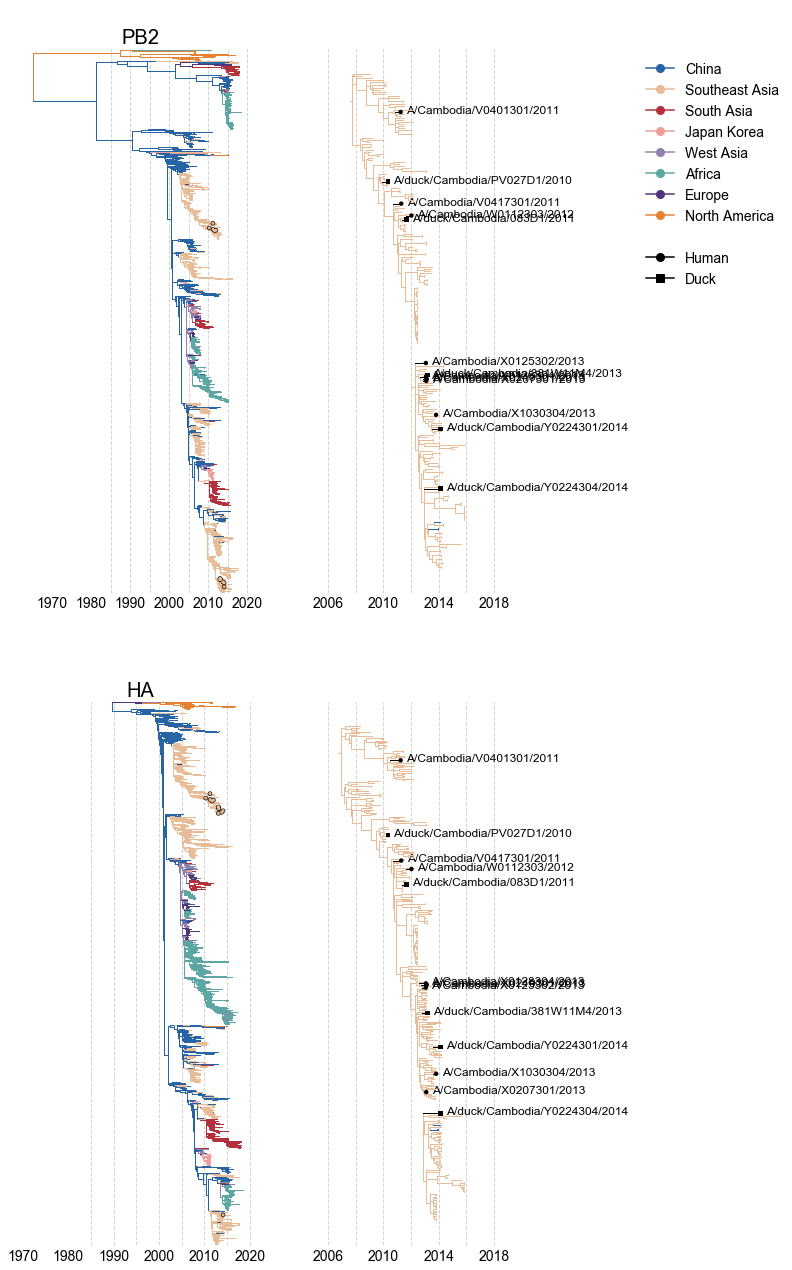

In [79]:
fig,((ax1,ax2,ax5),(ax3,ax4,ax6)) = plt.subplots(2,3, gridspec_kw={'width_ratios': [4,4,1], 'wspace':0.4}, figsize=(12,22),facecolor='w')  # the dimensions here are width x height

full_trees_axes_dict = {"PB2":ax1,"HA":ax3}   
subtrees_axes_dict = {"PB2":ax2,"HA":ax4}

branchWidth=1 ## default branch width

# this sets the grey vertical dotted lines
every=5
xDates=['%04d-%02d-01'%(y,m) for y in range(1970,2025) for m in range(0,56)]

# this sets the grey vertical dotted lines
every=5
xDates=['%04d-%02d-01'%(y,m) for y in range(1970,2025) for m in range(0,56)]

for f in full_trees_HA_PB2: 
    a = full_trees_axes_dict[f]
    [a.axvline(i,ls='--',lw=1,color='#D3D3D3',zorder=0) for i in range(1985,2025,5)]
    full_tree = full_trees_HA_PB2[f]
    title =  "\n"+ f 
    
    for k in full_tree.Objects: ## iterate over objects in tree

        x=k.absoluteTime ## or from x position determined earlier
        y=k.y ## get y position from .drawTree that was run earlier, but could be anything else

        xp=k.parent.absoluteTime ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0
        if xp==None:
            xp=x

        c='k'
        c=region_colors[k.traits['region']]

        if k.branchType=='leaf': ## if leaf...
            if k.traits['strain'] in my_list:
                s=10## tip size can be fixed
                shape = 'o'
            else:
                s=0
                shape = 'o'

            a.scatter(x,y,s=s,facecolor=c,edgecolor='none',marker=shape,zorder=11) ## plot circle for every tip
            a.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',marker=shape,zorder=10) ## plot black circle underneath

        elif k.branchType=='node': ## if node...
            #branchWidth+=10.0*len(k.leaves)/float(L)   # make deeper branches fatter
            #c="#9F9F9F"

            if len(k.children)==1:
                a.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=branchWidth,marker='|') ## mark every node in the tree to highlight that it's a multitype tree
            a.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')

        a.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)


    # set axis limits, remove border lines         
    a.spines['left'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['bottom'].set_visible(False)

    a.set_ylim(-5,full_tree.ySpan+5)
    a.tick_params(axis='y',labelsize=0,size=0)
    a.tick_params(axis='x',labelsize=16,size=0)
    a.set_yticklabels([])
    #a.grid(axis='x',ls='-',color='grey')
    a.set_xticks([1970,1980,1990, 2000, 2010, 2020])
    a.set_xticklabels([1970,1980,1990, 2000, 2010, 2020], fontsize=14)
    
    # add a title to each subplot
    a.set_title(title,fontsize=20)

##############################################################
## CLOSEUP TREE ##
##############################################################
branchWidth = 1
tipSize = 20
label_text_size = 12

for g in gene_subtrees_HA_PB2:
    
    # set up axes, values to subtract
    a = subtrees_axes_dict[g]
    [a.axvline(i,ls='--',lw=1,color='#D3D3D3',zorder=0) for i in range(2006,2020,2)]
    title = "\n" + g 

    max_min_y_values = find_max_and_min_y_values(gene_subtrees[g])
    values_to_subtract = calculate_differences_between_trees(max_min_y_values)
    
    for subtree in gene_subtrees[g]:

        # subtract y values to rescale plotting area
        if subtree in values_to_subtract:
            y_value_to_subtract = values_to_subtract[subtree]
        else:
            y_value_to_subtract = 0
            
        # pasted in 
        for k in subtree.Objects: ## iterate over objects in tree

            x=k.absoluteTime 
            y=k.y - y_value_to_subtract 

            xp=k.parent.absoluteTime ## get x position of current object's parent
            if x==None: ## matplotlib won't plot Nones, like root
                x=0.0
            if xp==None:
                xp=x

            c='k'
            c=region_colors[k.traits['region']]

            if k.branchType=='leaf': ## if leaf...
                label_position = k.absoluteTime + (k.absoluteTime*0.0002), k.y-y_value_to_subtract-0.75
                
                if k.traits['strain'] in my_list:
                    s=tipSize
                    label_size = label_text_size
                    label_text = k.traits['strain']
                    
                    if 'duck' in k.traits['strain']:
                        shape = 's'
                        c = duck_color
                    else:
                        shape = 'o'
                        c = human_color
                else:
                    s=0
                    shape = 'o'
                    label_size = 0
                    label_text = ""

                a.scatter(x,y,s=s,facecolor=c,edgecolor='none',marker=shape,zorder=11) ## plot circle for every tip
                #a.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',marker=shape,zorder=10) ## plot black circle underneath
                a.text(x,y,position=label_position,s=label_text,size=label_size)
                
            elif k.branchType=='node': 
                if len(k.children)==1:
                    a.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=branchWidth,marker='|') 
                a.plot([x,x],[k.children[-1].y - y_value_to_subtract,k.children[0].y - y_value_to_subtract],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')

            a.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)

        # set axis limits, remove border lines         
        a.spines['left'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.spines['bottom'].set_visible(False)

        a.set_xlim(2006,2023)
        a.tick_params(axis='y',labelsize=0,size=0)
        a.tick_params(axis='x',labelsize=16,size=0, width=0,color='grey')
        a.set_yticklabels([])
        a.set_xticks([2006,2008,2010,2012,2014,2016,2018])
        a.set_xticklabels([2006,"",2010,"",2014,"",2018], fontsize=14)
        

# add in a legend
han_list = []

for key in region_colors:
    marker = mlines.Line2D(range(1), range(1), color = region_colors[key], marker=markers_dict[key], markerfacecolor = region_colors[key], label = key.replace("_"," ").title(), markersize = 8, markeredgewidth=1)
    han_list.append(marker)
ax5.legend(handles = han_list,markerfirst = True, frameon=False, loc=2, fontsize=14)

# format legend and empty plot; set axis limits, remove border lines         
ax5.spines['left'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.tick_params(axis='y',labelsize=0,size=0)
ax5.tick_params(axis='x',labelsize=0,size=0)
ax5.set_yticklabels([])
ax5.set_xticklabels([])

ax6.spines['left'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['bottom'].set_visible(False)
ax6.tick_params(axis='y',labelsize=0,size=0)
ax6.tick_params(axis='x',labelsize=0,size=0)
ax6.set_yticklabels([])
ax6.set_xticklabels([])
             
plt.savefig('Fig-1-HA-PB2-trees-2019-10-18.pdf',bbox_inches = 'tight',pad_inches = 0)
plt.show()

## Figure 1: HA full phylogeny with subtrees containing the Cambodia samples described in the paper. 

Plot the full HA phylogeny with callouts to the clades containing the Cambodia samples for which we have within-host data. 

In [20]:
full_trees_HA = {"HA":HA_tree}
gene_subtrees_HA = {"HA":HA_subtrees}

In [ ]:
region_colors = {"china":"#2664A5","southeast_asia":"#E7BC96","south_asia":"#B2313D","japan_korea":"#EF9E98",
                 "west_asia":"#9281AC","africa":"#5CA7A4","europe":"#50357A","north_america":"#E68234",
                 "":"#ffffff","":"#ffffff","":"#ffffff","human":"#000000", "duck":"#000000"}

not_mine_color = "#ffffff"
human_color = "#C75643"
duck_color = "#545AB7"

markers_dict = {"china":"o","southeast_asia":"o","south_asia":"o","japan_korea":"o",
                 "west_asia":"o","africa":"o","europe":"o","north_america":"o",
                 "":"","human":"o", "duck":"s"}

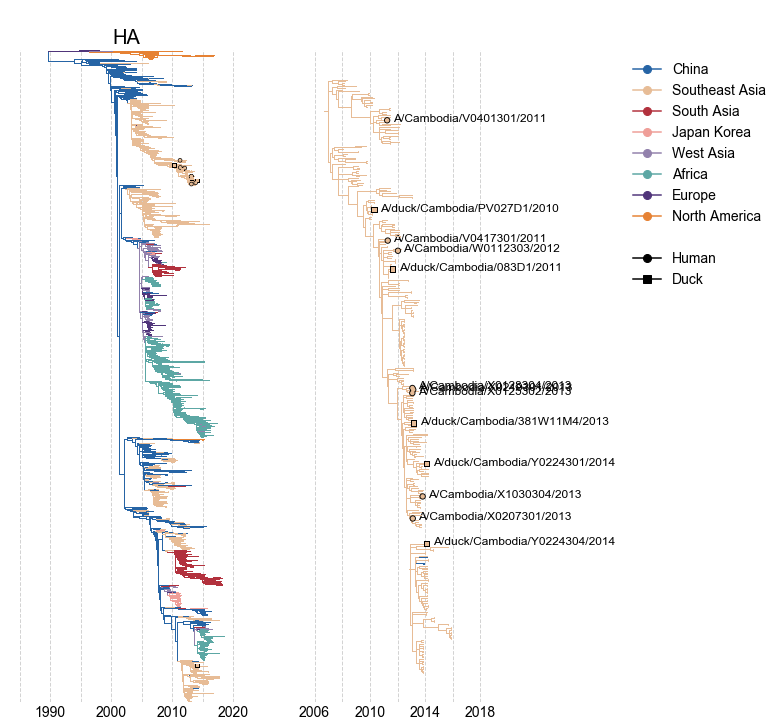

In [28]:
fig,(ax1,ax2,ax5) = plt.subplots(1,3, gridspec_kw={'width_ratios': [4,4,1], 'wspace':0.4}, figsize=(12,12),facecolor='w')  # the dimensions here are width x height

full_trees_axes_dict = {"HA":ax1}   
subtrees_axes_dict = {"HA":ax2}

branchWidth=1 ## default branch width

# this sets the grey vertical dotted lines
every=5
xDates=['%04d-%02d-01'%(y,m) for y in range(1985,2025) for m in range(0,56)]

for f in full_trees_HA: 
    a = full_trees_axes_dict[f]
    [a.axvline(i,ls='--',lw=1,color='#D3D3D3',zorder=0) for i in range(1985,2025,5)]
    full_tree = full_trees_HA[f]
    title =  "\n"+ f 
    
    for k in full_tree.Objects: ## iterate over objects in tree

        x=k.absoluteTime ## or from x position determined earlier
        y=k.y ## get y position from .drawTree that was run earlier, but could be anything else

        xp=k.parent.absoluteTime ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0
        if xp==None:
            xp=x

        c='k'
        c=region_colors[k.traits['region']]

        if k.branchType=='leaf': ## if leaf...
            if k.traits['strain'] in my_list:
                s=10## tip size can be fixed
                if 'duck' in k.traits['strain']:
                    shape = 's'
                else:
                    shape = 'o'
            else:
                s=0
                shape = 'o'

            a.scatter(x,y,s=s,facecolor=c,edgecolor='none',marker=shape,zorder=11) ## plot circle for every tip
            a.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',marker=shape,zorder=10) ## plot black circle underneath

        elif k.branchType=='node': ## if node...

            if len(k.children)==1:
                a.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=branchWidth,marker='|') 
            a.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')

        a.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)


    # set axis limits, remove border lines         
    a.spines['left'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['bottom'].set_visible(False)

    a.set_ylim(-5,full_tree.ySpan+5)
    a.tick_params(axis='y',labelsize=0,size=0)
    a.tick_params(axis='x',labelsize=16,size=0)
    a.set_yticklabels([])
    #a.grid(axis='x',ls='-',color='grey')
    a.set_xticks([1990, 2000, 2010, 2020])
    a.set_xticklabels([1990, 2000, 2010, 2020], fontsize=14)
    
    # add a title to each subplot
    a.set_title(title,fontsize=20)

##############################################################
## CLOSEUP TREE ##
##############################################################
branchWidth = 1
tipSize = 20
label_text_size = 12

for g in gene_subtrees_HA:
    
    # set up axes, values to subtract
    a = subtrees_axes_dict[g]
    [a.axvline(i,ls='--',lw=1,color='#D3D3D3',zorder=0) for i in range(2006,2020,2)]
    title = "\n" + g 

    max_min_y_values = find_max_and_min_y_values(gene_subtrees_HA[g])
    values_to_subtract = calculate_differences_between_trees(max_min_y_values)
    
    for subtree in gene_subtrees_HA[g]:

        # subtract y values to rescale plotting area
        if subtree in values_to_subtract:
            y_value_to_subtract = values_to_subtract[subtree]
        else:
            y_value_to_subtract = 0
            
        # pasted in 
        for k in subtree.Objects: ## iterate over objects in tree

            x=k.absoluteTime 
            y=k.y - y_value_to_subtract 

            xp=k.parent.absoluteTime ## get x position of current object's parent
            if x==None: ## matplotlib won't plot Nones, like root
                x=0.0
            if xp==None:
                xp=x

            c='k'
            c=region_colors[k.traits['region']]

            if k.branchType=='leaf': ## if leaf...
                label_position = k.absoluteTime + (k.absoluteTime*0.0002), k.y-y_value_to_subtract-0.75
                
                if k.traits['strain'] in my_list:
                    s=tipSize
                    label_size = label_text_size
                    label_text = k.traits['strain']
                    
                    if 'duck' in k.traits['strain']:
                        shape = 's'
                        c = region_colors[k.traits['region']]
                    else:
                        shape = 'o'
                        c = region_colors[k.traits['region']]
                else:
                    s=0
                    shape = 'o'
                    label_size = 0
                    label_text = ""

                a.scatter(x,y,s=s,facecolor=c,edgecolor='none',marker=shape,zorder=11) ## plot circle for every tip
                a.scatter(x,y,s=s*2,facecolor='black',edgecolor='none',marker=shape,zorder=10) ## plot black circle underneath
                a.text(x,y,position=label_position,s=label_text,size=label_size)
                
            elif k.branchType=='node': 
                if len(k.children)==1:
                    a.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=branchWidth,marker='|') 
                a.plot([x,x],[k.children[-1].y - y_value_to_subtract,k.children[0].y - y_value_to_subtract],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')

            a.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)

        # set axis limits, remove border lines         
        a.spines['left'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.spines['bottom'].set_visible(False)

        a.set_xlim(2006,2023)
        a.tick_params(axis='y',labelsize=0,size=0)
        a.tick_params(axis='x',labelsize=16,size=0, width=0,color='grey')
        a.set_yticklabels([])
        a.set_xticks([2006,2008,2010,2012,2014,2016,2018])
        a.set_xticklabels([2006,"",2010,"",2014,"",2018], fontsize=14)
        

# add in a legend
han_list = []

for key in region_colors:
    marker = mlines.Line2D(range(1), range(1), color = region_colors[key], marker=markers_dict[key], markerfacecolor = region_colors[key], label = key.replace("_"," ").title(), markersize = 8, markeredgewidth=1)
    han_list.append(marker)
ax5.legend(handles = han_list,markerfirst = True, frameon=False, loc=2, fontsize=14)

# format legend and empty plot; set axis limits, remove border lines         
ax5.spines['left'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.tick_params(axis='y',labelsize=0,size=0)
ax5.tick_params(axis='x',labelsize=0,size=0)
ax5.set_yticklabels([])
ax5.set_xticklabels([])
             
plt.savefig('Fig-1-HA-trees-2019-10-18.pdf',bbox_inches = 'tight',pad_inches = 0)
plt.show()

## Figure S2: Make a huge supplemental figure with all the genes 

For each gene, have the full tree side by side with the higlighted clades containing my samples. 

In [19]:
# set up dictionaries with all the trees in them 
full_trees = {"PB2":PB2_tree, "PB1":PB1_tree, "PA":PA_tree, "HA":HA_tree, "NP":NP_tree, 
              "NA":NA_tree, "MP":MP_tree, "NS":NS_tree}
gene_subtrees = {"PB2":PB2_subtrees, "PB1":PB1_subtrees,"PA":PA_subtrees,"HA":HA_subtrees,"NP":NP_subtrees,
        "NA":NA_subtrees,"MP":MP_subtrees,"NS":NS_subtrees}

In [22]:
region_colors = {"china":"#2664A5","southeast_asia":"#E7BC96","south_asia":"#B2313D","japan_korea":"#EF9E98",
                 "west_asia":"#9281AC","africa":"#5CA7A4","europe":"#50357A","north_america":"#E68234",
                 "":"#ffffff","":"#ffffff","":"#ffffff","human":"black", "duck":"black"}

not_mine_color = "#ffffff"
human_color = "#C75643"
duck_color = "#545AB7"

In [23]:
markers_dict = {"china":"o","southeast_asia":"o","south_asia":"o","japan_korea":"o",
                 "west_asia":"o","africa":"o","europe":"o","north_america":"o",
                 "":"","human":"o", "duck":"s"}

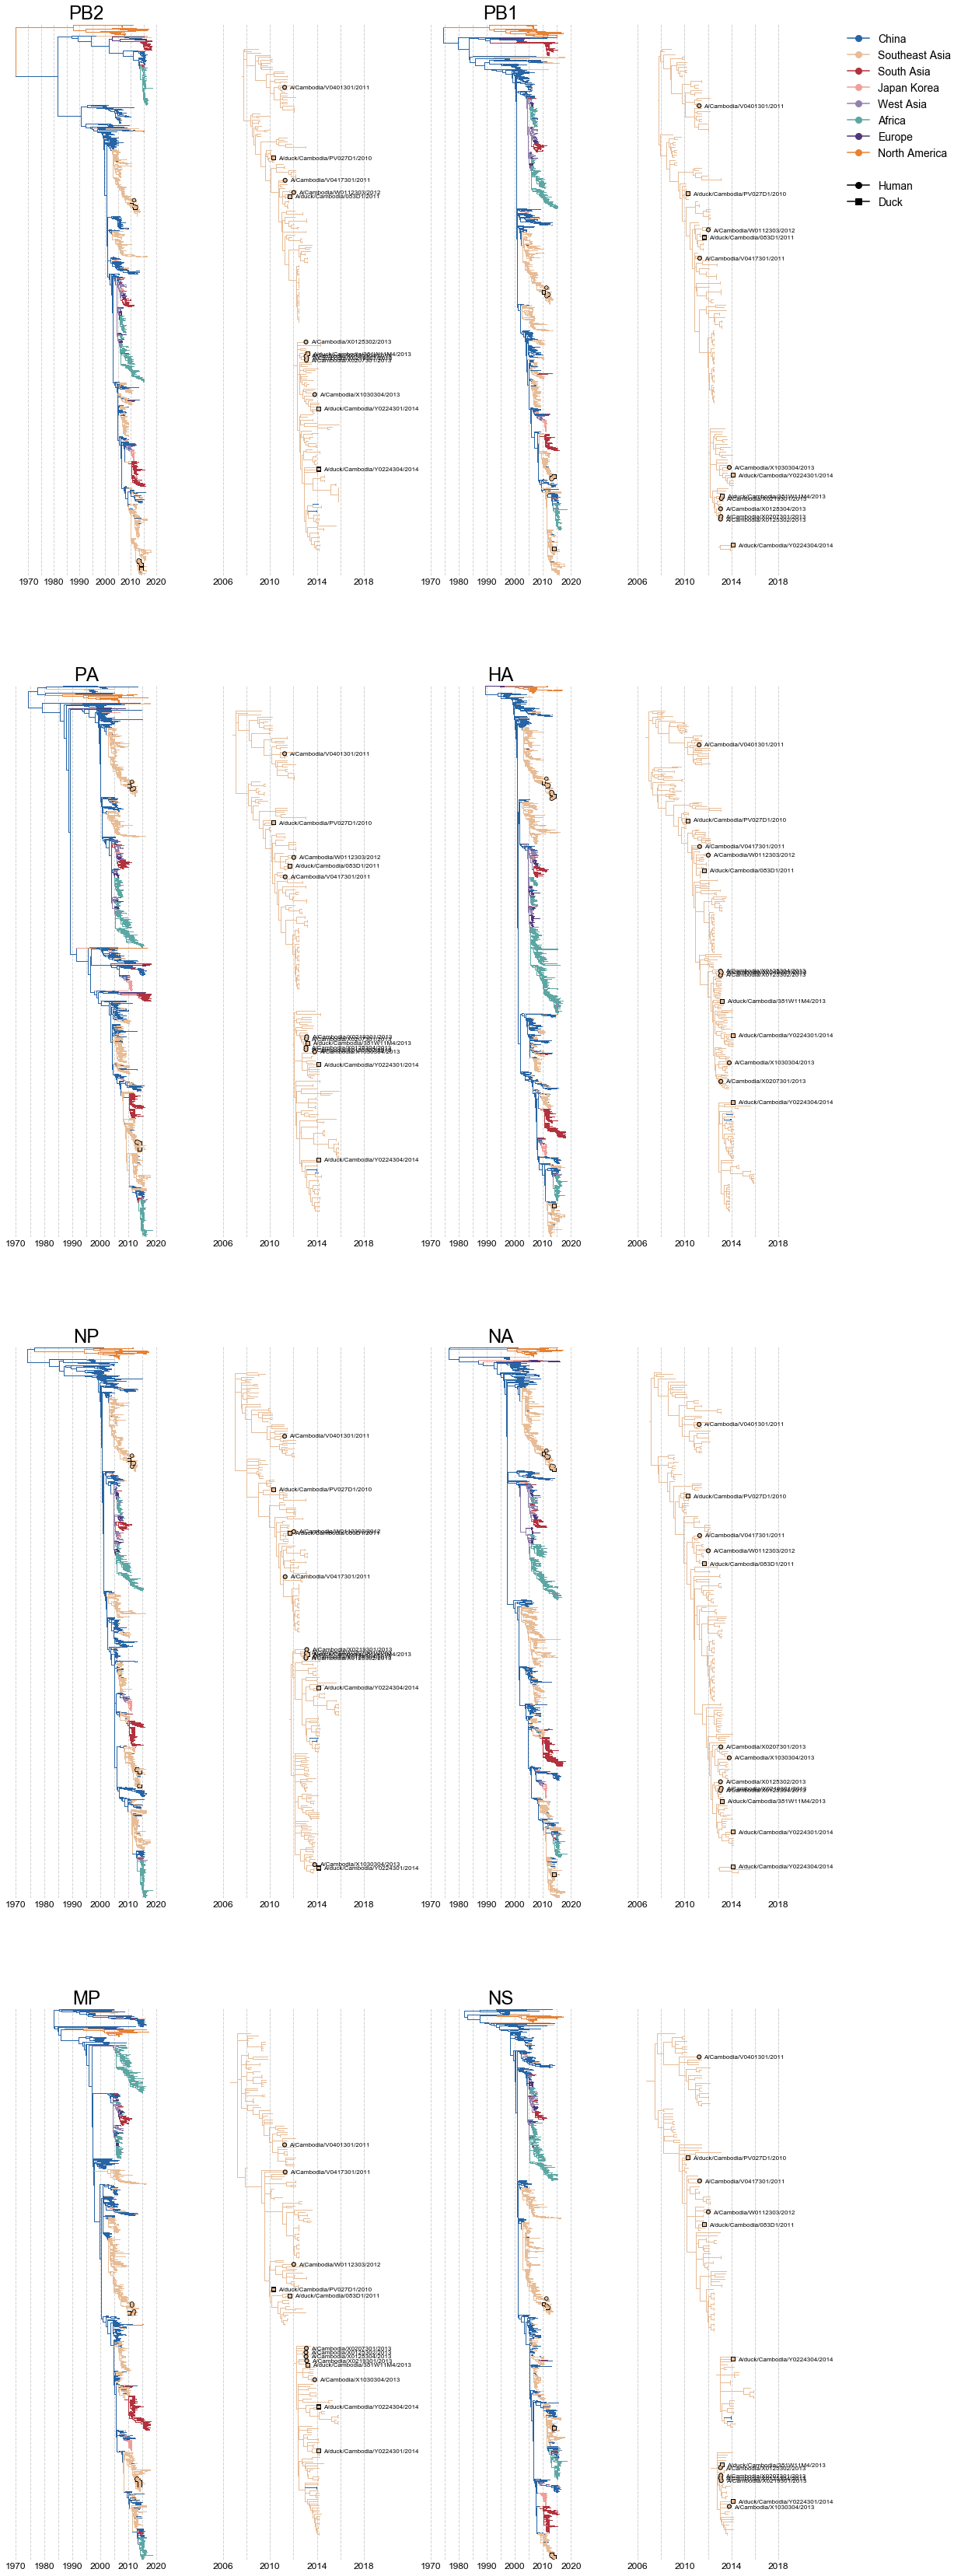

In [33]:
fig,((ax1,ax2,ax3,ax4,ax17),(ax5,ax6,ax7,ax8,ax18),(ax9,ax10,ax11,ax12,ax19),(ax13,ax14,ax15,ax16,ax20)) = plt.subplots(4, 5, gridspec_kw={'width_ratios': [4,4,4,4,1], 'wspace':0.4}, figsize=(20,60),facecolor='w')  # the dimensions here are width x height

full_trees_axes_dict = {"PB2":ax1,"PB1":ax3,"PA":ax5,"HA":ax7,"NP":ax9,"NA":ax11,"MP":ax13,"NS":ax15}
subtrees_axes_dict = {"PB2":ax2,"PB1":ax4,"PA":ax6,"HA":ax8,"NP":ax10,"NA":ax12,"MP":ax14,"NS":ax16}

branchWidth=1 ## default branch width

# this sets the grey vertical shading 
every=5
xDates=['%04d-%02d-01'%(y,m) for y in range(1970,2025) for m in range(0,56)]

for f in full_trees: 
    a = full_trees_axes_dict[f]
    [a.axvline(i,ls='--',lw=1,color='#D3D3D3',zorder=0) for i in range(1970,2025,5)]
    full_tree = full_trees[f]
    title = f 
    
    for k in full_tree.Objects: ## iterate over objects in tree

        x=k.absoluteTime ## or from x position determined earlier
        y=k.y ## get y position from .drawTree that was run earlier, but could be anything else

        xp=k.parent.absoluteTime ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0
        if xp==None:
            xp=x

        c='k'
        c=region_colors[k.traits['region']]

        if k.branchType=='leaf': ## if leaf...
            if k.traits['strain'] in my_list:
                s=15 ## tip size can be fixed
                if 'duck' in k.traits['strain']:
                    shape = 's'
                else:
                    shape = 'o'
            else:
                s=0
                shape = 'o'

            a.scatter(x,y,s=s,facecolor=c,edgecolor='none',marker=shape,zorder=11) ## plot circle for every tip
            a.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',marker=shape,zorder=10) ## plot black circle underneath

        elif k.branchType=='node': ## if node...
            #branchWidth+=10.0*len(k.leaves)/float(L)   # make deeper branches fatter
            #c="#9F9F9F"

            if len(k.children)==1:
                a.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=branchWidth,marker='|') ## mark every node in the tree to highlight that it's a multitype tree
            a.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')

        a.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)


    # set axis limits, remove border lines         
    a.spines['left'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['bottom'].set_visible(False)

    a.set_ylim(-5,full_tree.ySpan+5)
    a.tick_params(axis='y',labelsize=0,size=0)
    a.tick_params(axis='x',labelsize=16,size=0)
    a.set_yticklabels([])
    #a.grid(axis='x',ls='-',color='grey')
    a.set_xticks([1970, 1980, 1990, 2000, 2010, 2020])
    a.set_xticklabels([1970, 1980, 1990, 2000, 2010, 2020], fontsize=12)
    
    # add a title to each subplot
    a.set_title(title, fontsize=24)

##############################################################
## CLOSEUP TREE ##
##############################################################
branchWidth = 1
tipSize = 15
label_text_size = 8

cumulative_y = 0
for g in gene_subtrees:
    
    max_min_y_values = find_max_and_min_y_values(gene_subtrees[g])
    values_to_subtract = calculate_differences_between_trees(max_min_y_values)

    for subtree in gene_subtrees[g]:

        a = subtrees_axes_dict[g]
        [a.axvline(i,ls='--',lw=1,color='#D3D3D3',zorder=0) for i in range(2006,2020,2)]
        title = g 

        # subtract y values to rescale plotting area
        if subtree in values_to_subtract:
            y_value_to_subtract = values_to_subtract[subtree]
        else:
            y_value_to_subtract = 0

        for k in subtree.Objects: ## iterate over objects in tree

            x=k.absoluteTime 
            y=k.y - y_value_to_subtract 

            xp=k.parent.absoluteTime ## get x position of current object's parent
            if x==None: ## matplotlib won't plot Nones, like root
                x=0.0
            if xp==None:
                xp=x

            c='k'
            c=region_colors[k.traits['region']]

            if k.branchType=='leaf': ## if leaf...
                label_position = k.absoluteTime + (k.absoluteTime*0.0002), k.y-y_value_to_subtract-0.75

                if k.traits['strain'] in my_list:
                    s=tipSize
                    label_size = label_text_size
                    label_text = k.traits['strain']

                    if 'duck' in k.traits['strain']:
                        shape = 's'
                        c = region_colors[k.traits['region']]
                    else:
                        shape = 'o'
                        c = region_colors[k.traits['region']]
                else:
                    s=0
                    shape = 'o'
                    label_size = 0
                    label_text = ""

                a.scatter(x,y,s=s,facecolor=c,edgecolor='none',marker=shape,zorder=11) ## plot circle for every tip
                a.scatter(x,y,s=s*2.5,facecolor='k',edgecolor='none',marker=shape,zorder=10) ## plot black circle underneath
                a.text(x,y,position=label_position,s=label_text,size=label_size)

            elif k.branchType=='node': 
                if len(k.children)==1:
                    a.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=branchWidth,marker='|') 
                a.plot([x,x],[k.children[-1].y - y_value_to_subtract,k.children[0].y - y_value_to_subtract],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')

            a.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)

        # set axis limits, remove border lines         
        a.spines['left'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.spines['bottom'].set_visible(False)

        #ax.set_xlim(0.009,0.0105)
        a.tick_params(axis='y',labelsize=0,size=0)
        a.tick_params(axis='x',labelsize=16,size=0, width=0,color='grey')
        a.set_yticklabels([])
        a.set_xticks([2006,2010,2014,2018])
        a.set_xticklabels([2006,2010,2014,2018], fontsize=12)
        
        # add a title to each subplot
        # a.set_title(title, fontsize=20)
        
# add in a legend
han_list = []

for key in region_colors:
    marker = mlines.Line2D(range(1), range(1), color = region_colors[key], marker=markers_dict[key], markerfacecolor = region_colors[key], label = key.replace("_"," ").title(), markersize = 8)
    han_list.append(marker)
ax17.legend(handles = han_list,markerfirst = True, frameon=False, loc=2, fontsize=14)

# format legend and empty plot; set axis limits, remove border lines         
ax17.spines['left'].set_visible(False)
ax17.spines['right'].set_visible(False)
ax17.spines['top'].set_visible(False)
ax17.spines['bottom'].set_visible(False)
ax17.tick_params(axis='y',labelsize=0,size=0)
ax17.tick_params(axis='x',labelsize=0,size=0)
ax17.set_yticklabels([])
ax17.set_xticklabels([])

for a in [ax18,ax19,ax20]:
    a.spines['left'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.tick_params(axis='y',labelsize=0,size=0)
    a.tick_params(axis='x',labelsize=0,size=0)
    a.set_xticklabels([])
    a.set_yticklabels([])

plt.savefig('Fig-S2-trees-2019-10-18.pdf',bbox_inches = 'tight',pad_inches = 0)
plt.show()